In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report)

In [136]:
# Часть 1

In [137]:
# Загрузка датасета
file = 'data.csv'
data = pd.read_csv(file)

In [138]:
# Предобработка данных
# Удаление ненужных колонок
if 'id' in data.columns:
    data = data.drop(columns=['id'])

if 'Unnamed: 32' in data.columns:
    data = data.drop(columns=['Unnamed: 32'])

# Проверка пропущенных значений
print("Пропущенные значения перед обработкой:")
print(data.isnull().sum())

# Если есть пропущенные значения, заменяем их средним значением
data = data.fillna(data.mean())
data = data.replace([np.inf, -np.inf], np.nan).fillna(data.mean())
# Убедимся, что целевая переменная не содержит пропущенных значений
data = data.dropna(subset=['diagnosis'])

# Заполнение пропущенных значений (если есть) в остальных столбцах
data['diagnosis'] = data['diagnosis'].fillna(data.mean())

# Преобразование целевой переменной
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M -> 1, B -> 0

# Проверка уникальных значений
print("Уникальные значения в целевой переменной:")
print(data['diagnosis'].unique())

# Проверка на бесконечные значения
print("Проверка на бесконечные значения:")
print((data == np.inf).sum())
print((data == -np.inf).sum())

# Замена бесконечных значений на NaN и заполнение их средними значениями
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Проверка итоговых данных
print("Обзор данных после обработки:")
print(data.info())

# Масштабирование данных
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Выделение признаков и целевой переменной
X = data.iloc[:, 1:]  # Все признаки
y = data['diagnosis']   # Целевая переменная

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Проверка на оставшиеся NaN или Inf
print("Проверка X_train_scaled на NaN и Inf:")
print(f"NaN: {np.isnan(X_train_scaled).sum()}")
print(f"Inf: {np.isinf(X_train_scaled).sum()}")

print("Проверка X_test_scaled на NaN и Inf:")
print(f"NaN: {np.isnan(X_test_scaled).sum()}")
print(f"Inf: {np.isinf(X_test_scaled).sum()}")

# Замена оставшихся NaN и Inf на 0 (или другие значения)
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# Итоговые данные готовы для использования в модели
print("Данные успешно подготовлены для обучения.")

Пропущенные значения перед обработкой:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Уникальные значения в целевой переменной:
[1 0]
П

/var/folders/lz/q3bpvtbs3yb719r571sr1zlr0000gn/T/ipykernel_64601/3593253227.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())
/var/folders/lz/q3bpvtbs3yb719r571sr1zlr0000gn/T/ipykernel_64601/3593253227.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.replace([np.inf, -np.inf], np.nan).fillna(data.mean())
/var/folders/lz/q3bpvtbs3yb719r571sr1zlr0000gn/T/ipykernel_64601/3593253227.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data

In [139]:
# Базовые статистики
print(data.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

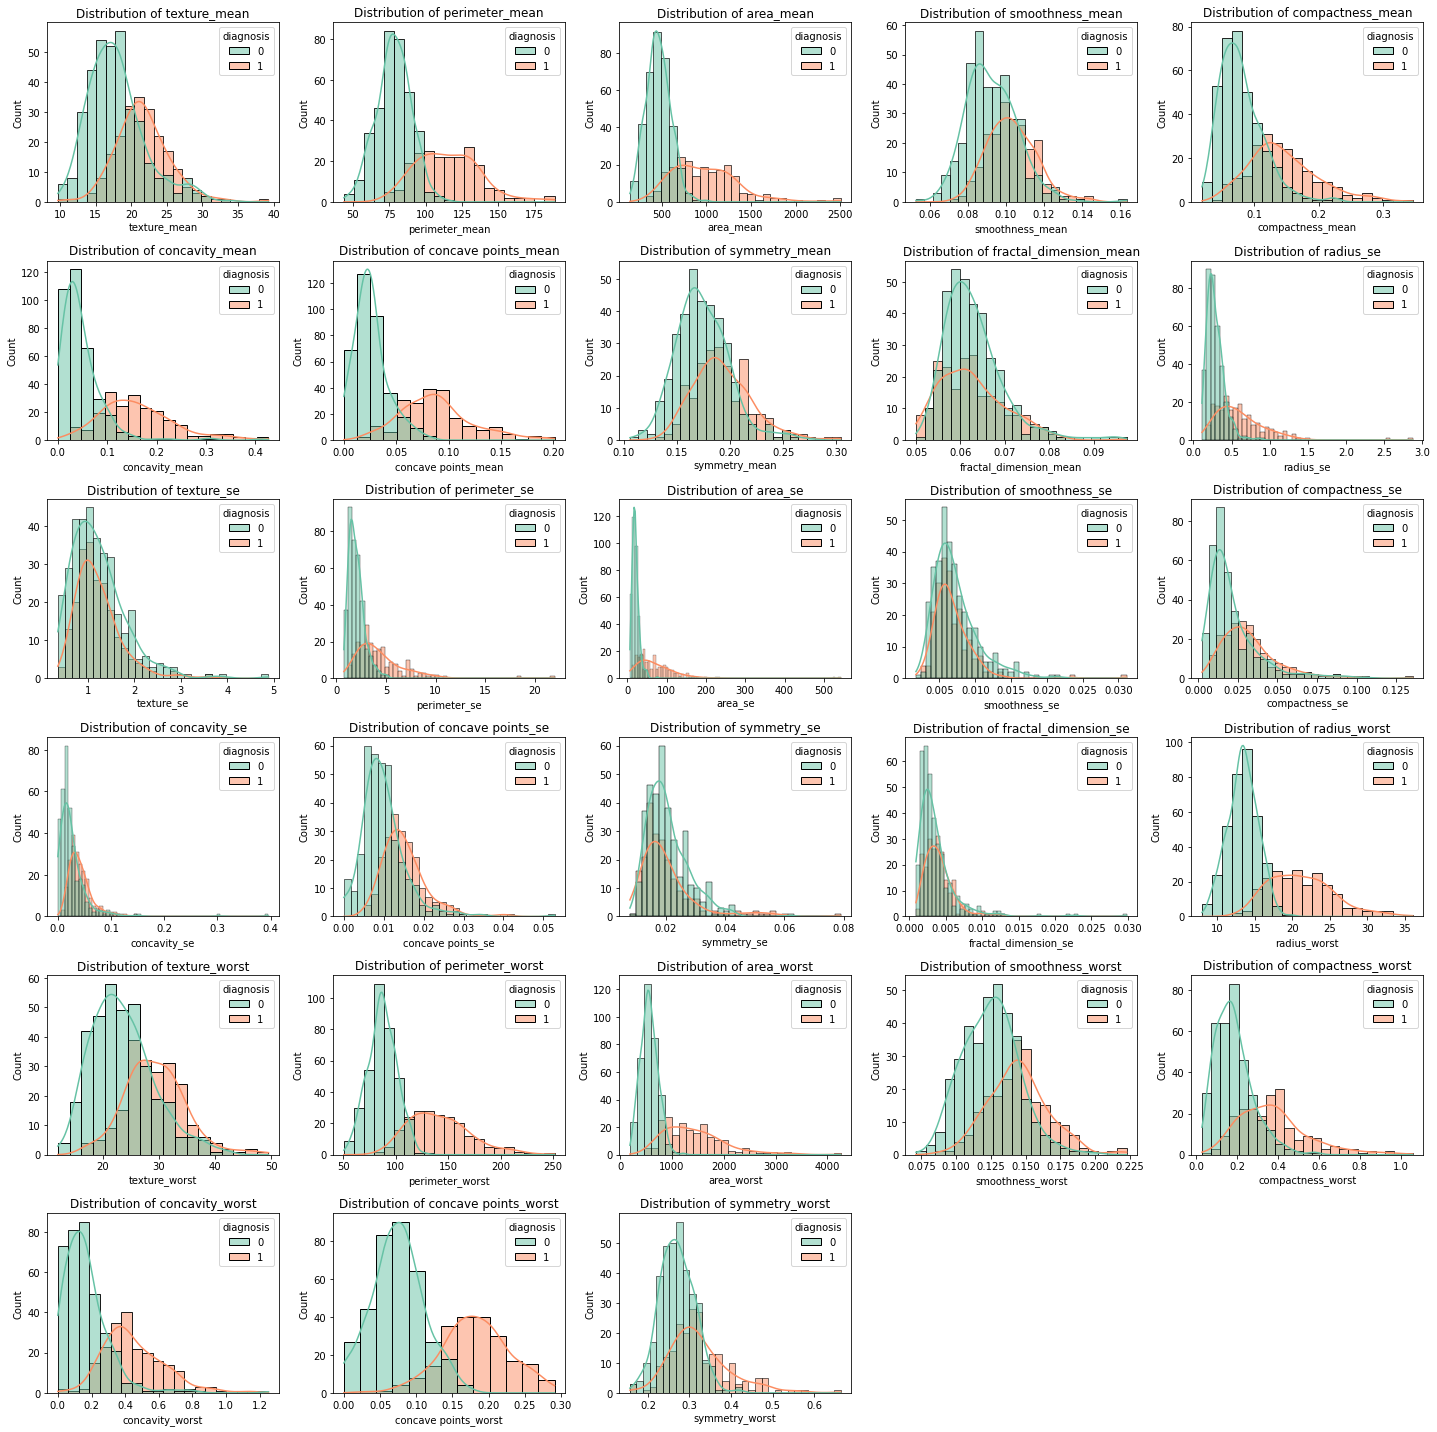

In [140]:
# Гистограммы признаков с учётом целевой переменной
features = data.columns[2:-1]  # Все признаки, кроме ID и целевой переменной
diagnosis = data['diagnosis']  # Целевая переменная

# Построение гистограмм
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(6, 5, i + 1)
    sns.histplot(data=data, x=feature, hue=diagnosis, kde=True, palette="Set2")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

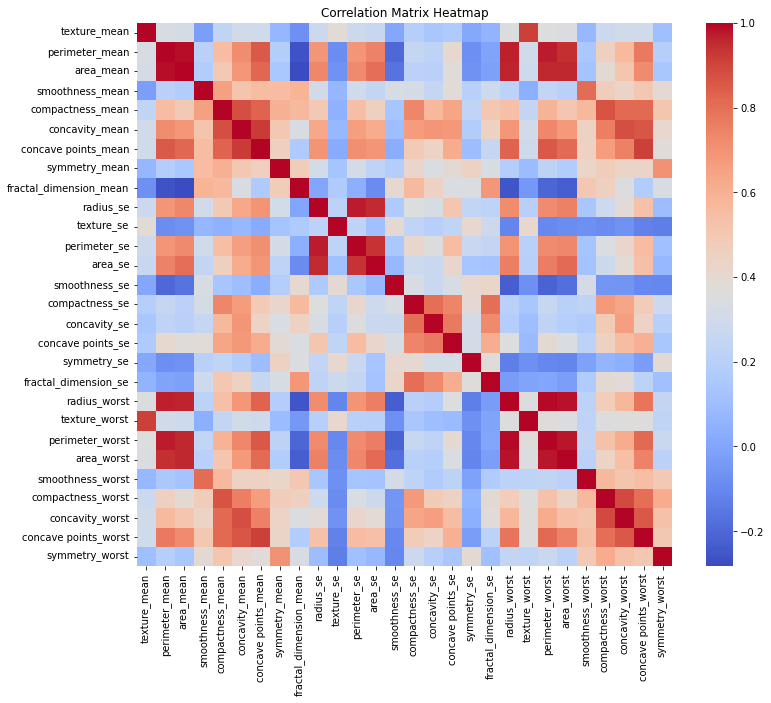

In [141]:
# Матрица корреляций и тепловая карта
correlation_matrix = data[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [142]:
# Поиск сильно скоррелированных признаков
threshold = 0.8  # Задаём порог
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1)]
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("Highly Correlated Pairs:\n", high_corr_pairs)

Highly Correlated Pairs:
                Feature 1            Feature 2  Correlation
0           texture_mean        texture_worst     0.912045
1         perimeter_mean            area_mean     0.986507
2         perimeter_mean  concave points_mean     0.850977
3         perimeter_mean         radius_worst     0.969476
4         perimeter_mean      perimeter_worst     0.970387
..                   ...                  ...          ...
69  concave points_worst       concavity_mean     0.861323
70  concave points_worst  concave points_mean     0.910155
71  concave points_worst      perimeter_worst     0.816322
72  concave points_worst    compactness_worst     0.801080
73  concave points_worst      concavity_worst     0.855434

[74 rows x 3 columns]


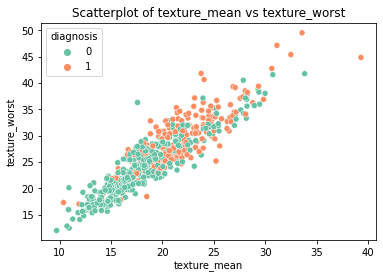

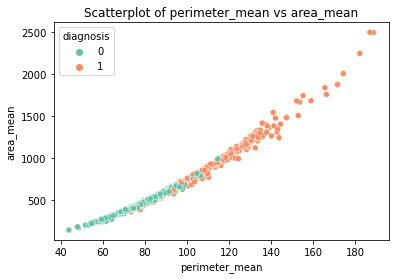

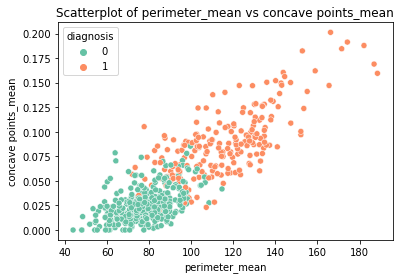

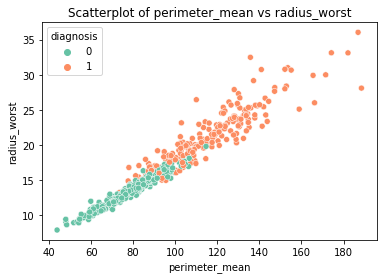

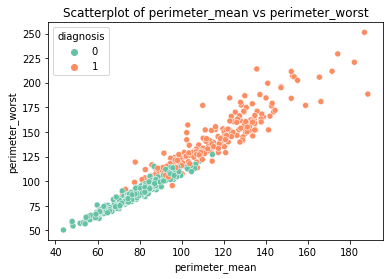

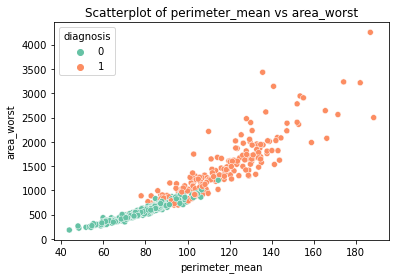

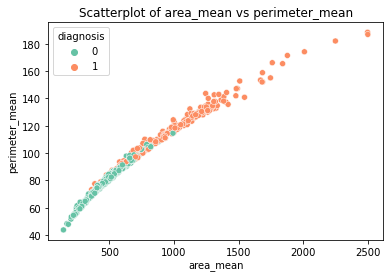

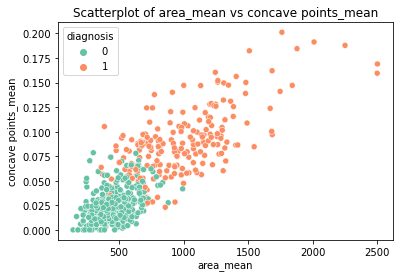

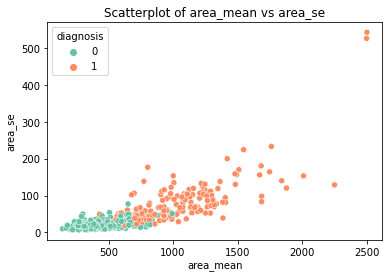

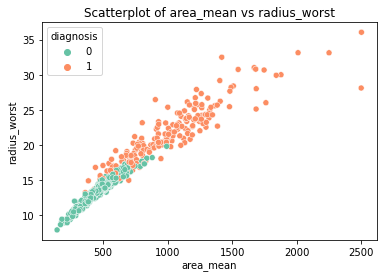

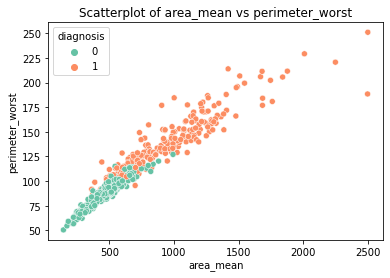

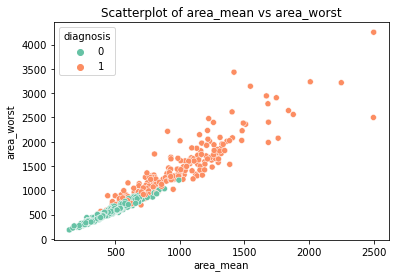

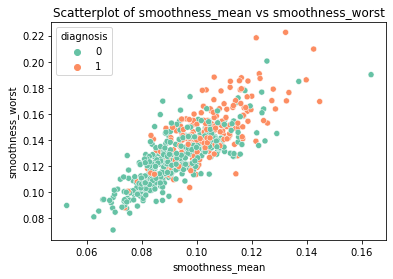

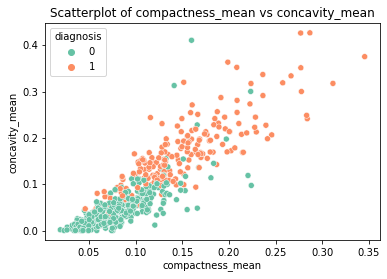

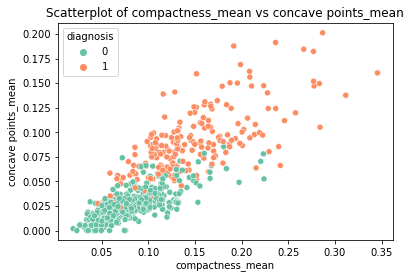

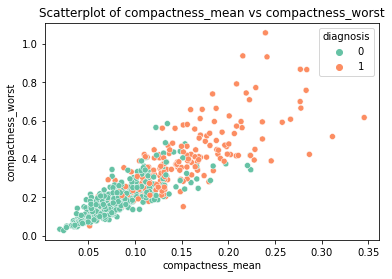

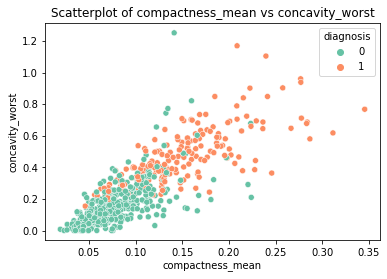

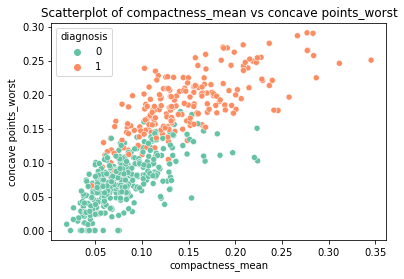

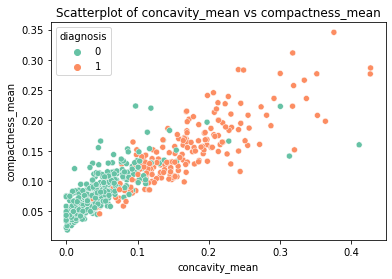

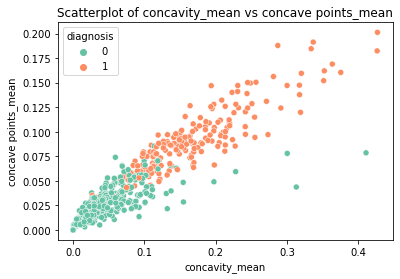

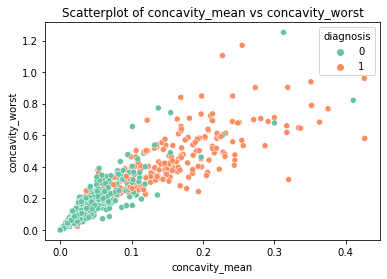

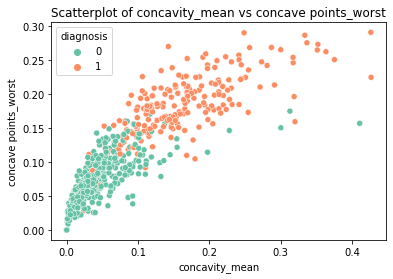

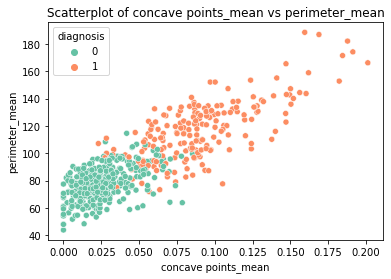

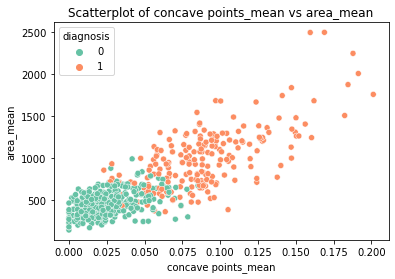

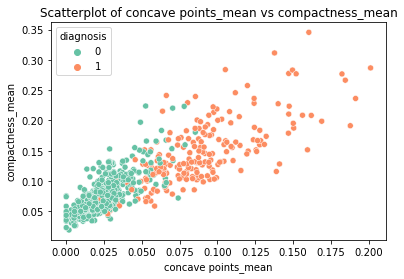

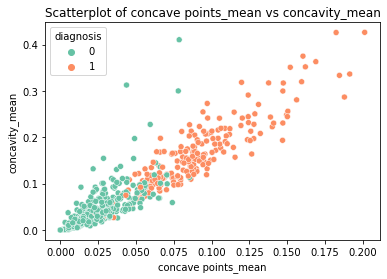

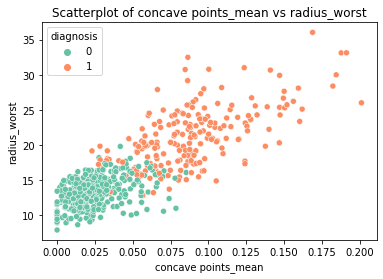

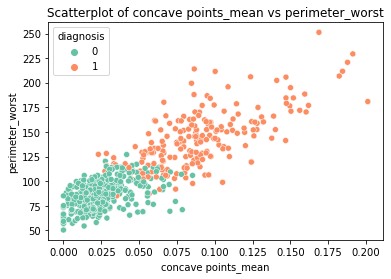

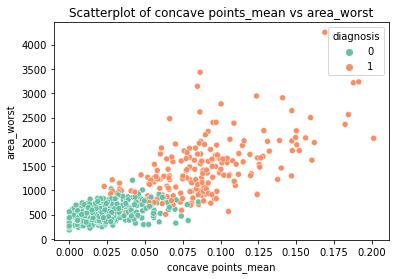

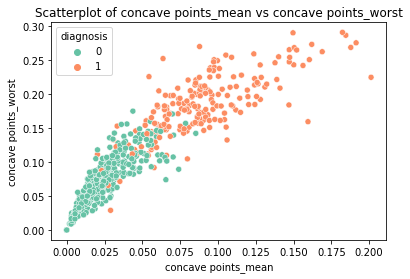

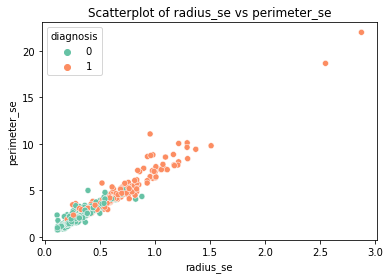

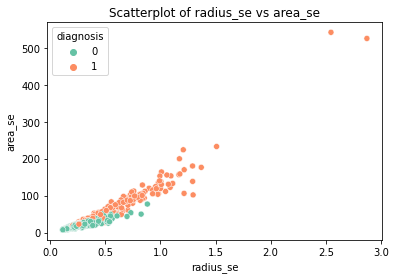

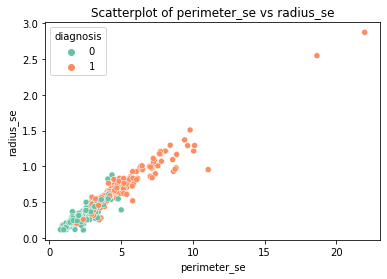

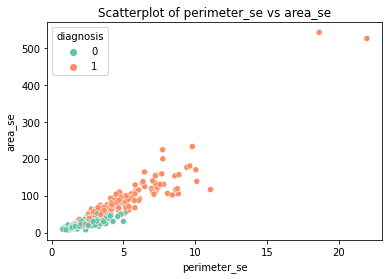

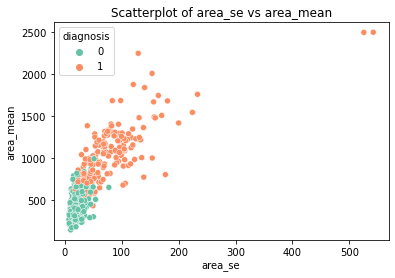

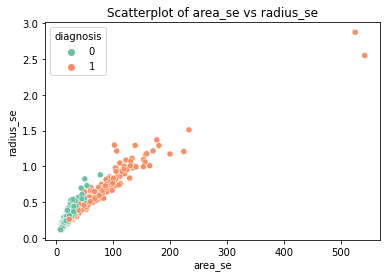

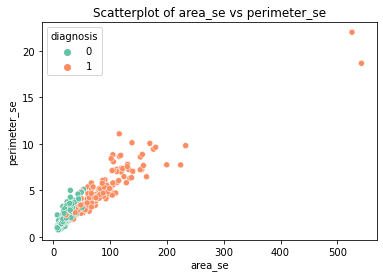

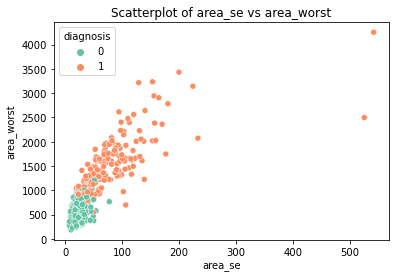

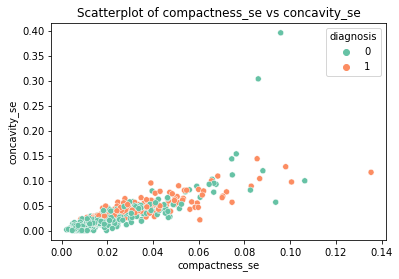

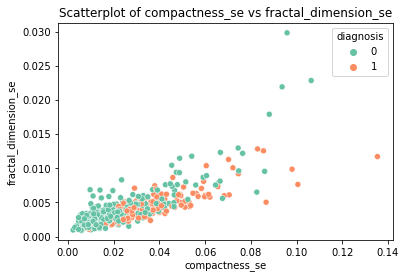

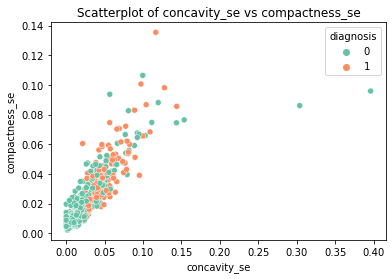

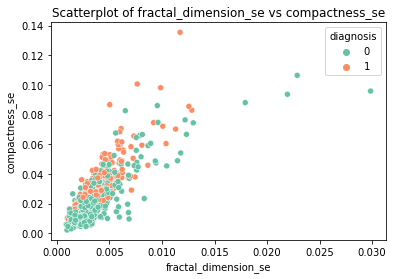

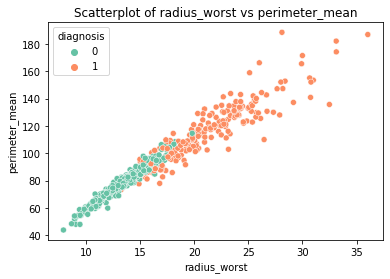

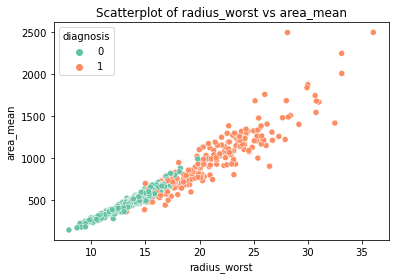

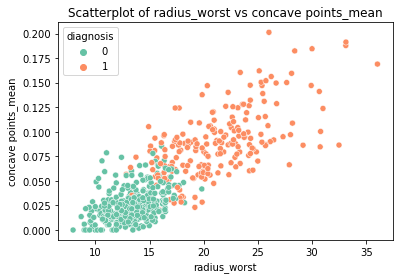

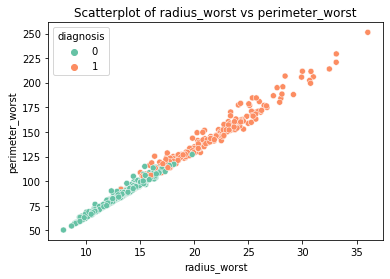

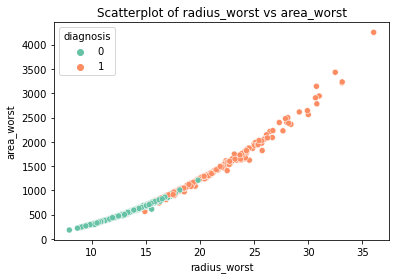

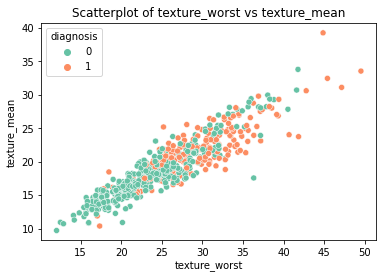

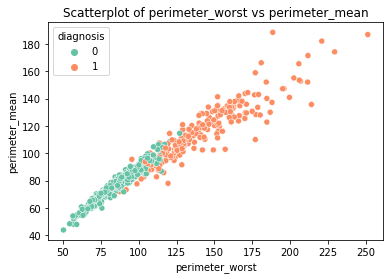

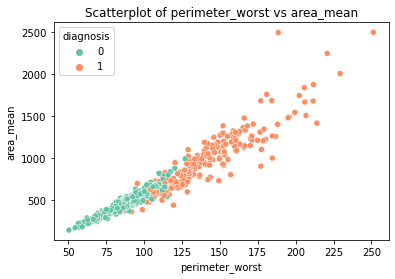

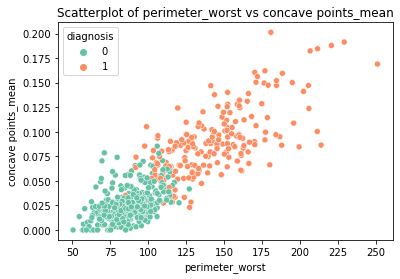

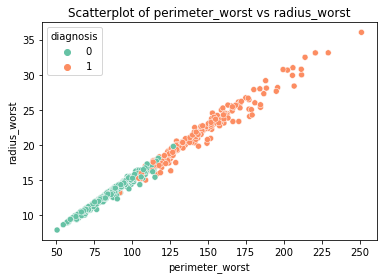

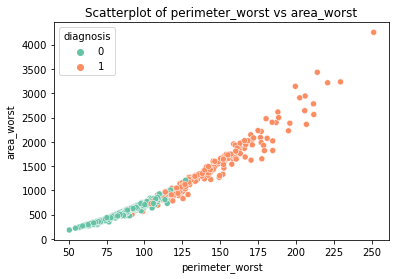

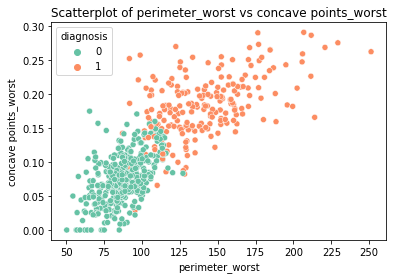

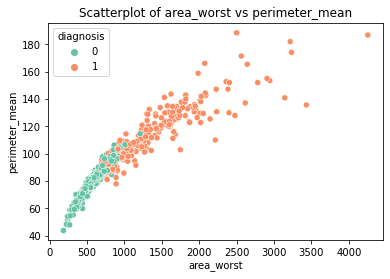

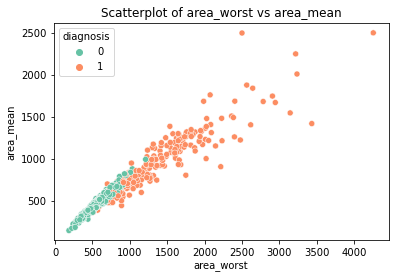

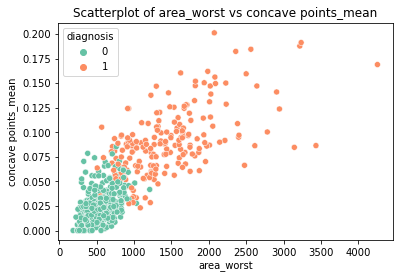

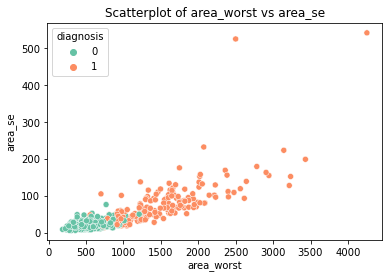

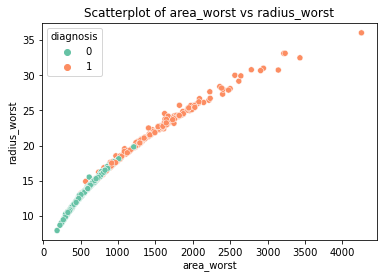

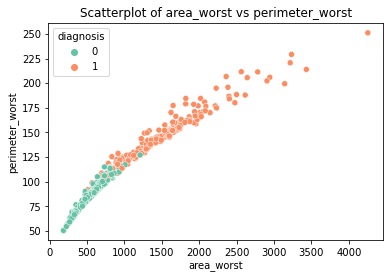

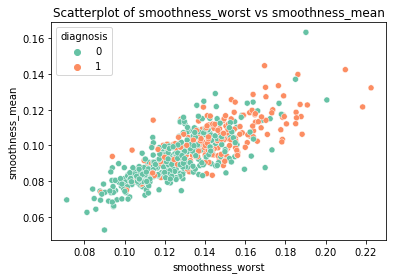

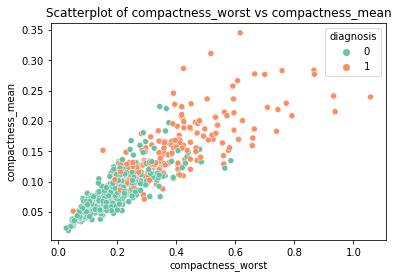

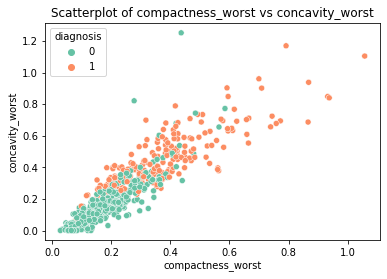

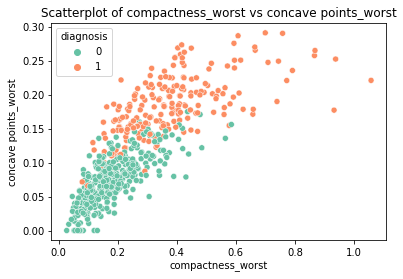

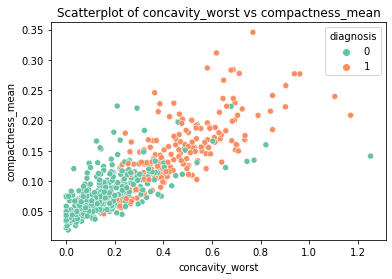

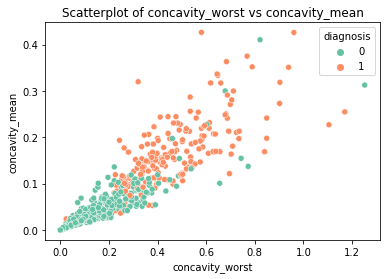

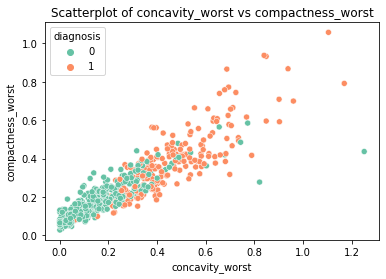

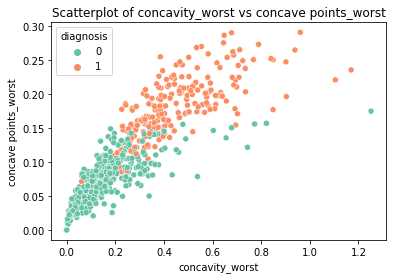

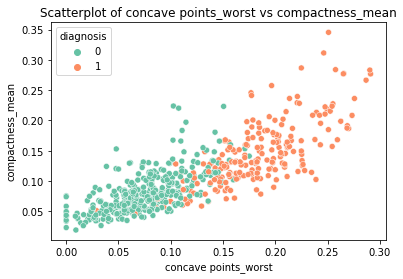

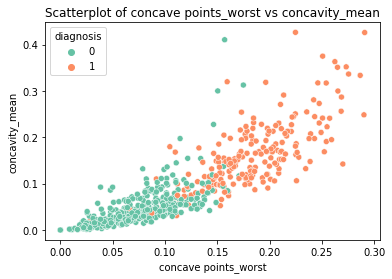

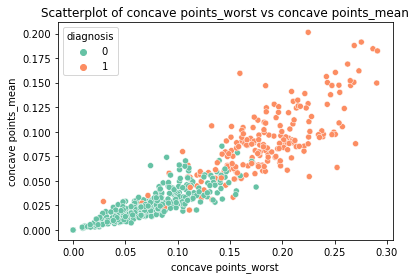

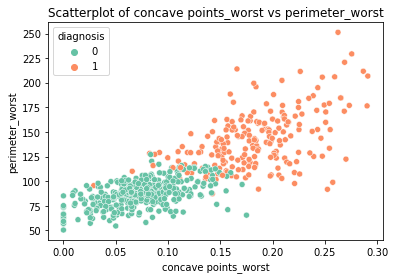

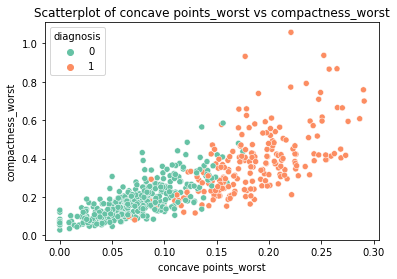

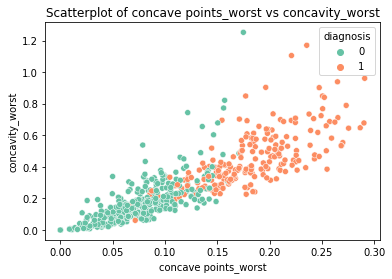

In [143]:
# Построение scatterplot для сильно скоррелированных признаков
for _, row in high_corr_pairs.iterrows():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=row['Feature 1'], y=row['Feature 2'], data=data, hue=diagnosis, palette="Set2")
    plt.title(f"Scatterplot of {row['Feature 1']} vs {row['Feature 2']}")
    plt.show()

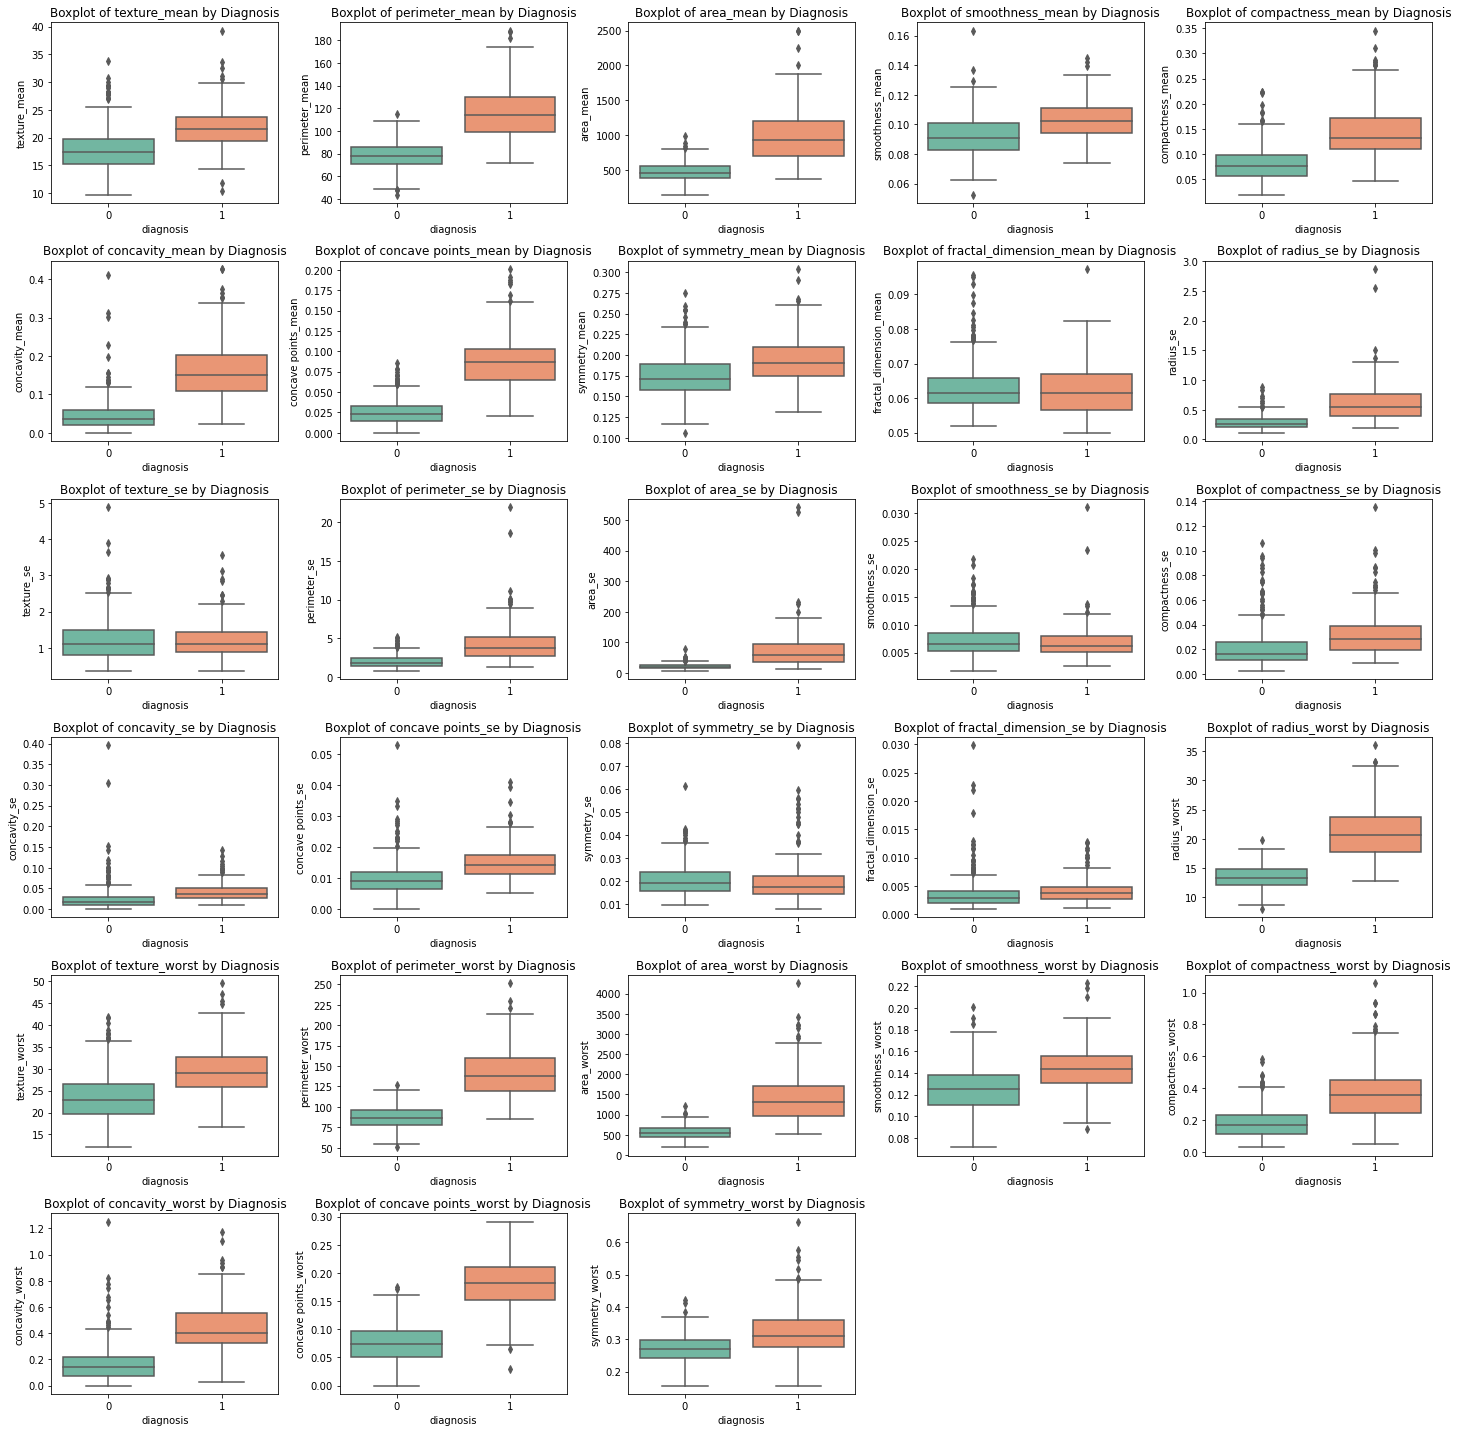

In [144]:
# Boxplots для оценки информативных признаков
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(data=data, x=diagnosis, y=feature, palette="Set2")
    plt.title(f"Boxplot of {feature} by Diagnosis")
plt.tight_layout()
plt.show()

In [145]:
# Часть 2

In [146]:
# Разделение данных на признаки и целевую переменную
X = data.iloc[:, 1:]  # Все признаки
y = data['diagnosis']  # Целевая переменная

# Разбиение на тренировочную и тестовую выборки (30% для теста)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
# Построение модели kNN (без настройки параметров)
knn = KNeighborsClassifier()

# Обучение модели
knn.fit(X_train_scaled, y_train)

# Предсказания
y_pred = knn.predict(X_test_scaled)

# Оценка метрик качества классификации
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9590643274853801
Precision: 0.9516129032258065
Recall: 0.9365079365079365
F1 Score: 0.944


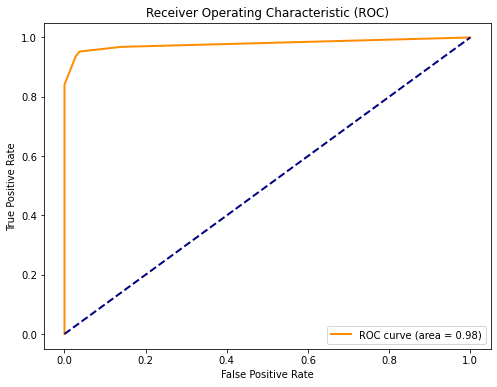

In [148]:
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

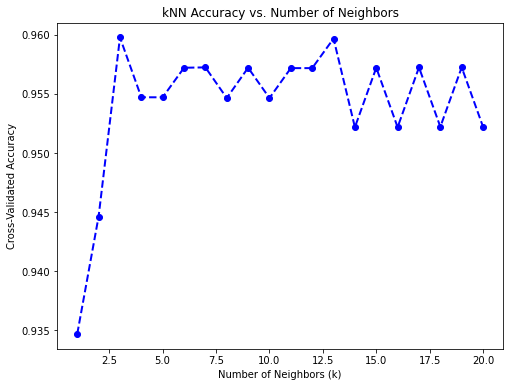

Optimal number of neighbors: 3


In [149]:
# Кросс-валидация для настройки числа соседей (n_neighbors)
k_range = range(1, 21)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Построение графика зависимости точности от числа соседей
plt.figure(figsize=(8, 6))
plt.plot(k_range, cv_scores, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('kNN Accuracy vs. Number of Neighbors')
plt.show()

# Определение оптимального значения k
optimal_k = k_range[np.argmax(cv_scores)]
print(f"Optimal number of neighbors: {optimal_k}")

In [150]:
# Построение модели с оптимальным числом соседей
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Оценка метрик с оптимальным числом соседей
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)

print(f"Optimal k Accuracy: {accuracy_optimal}")
print(f"Optimal k Precision: {precision_optimal}")
print(f"Optimal k Recall: {recall_optimal}")
print(f"Optimal k F1 Score: {f1_optimal}")

Optimal k Accuracy: 0.9590643274853801
Optimal k Precision: 0.9516129032258065
Optimal k Recall: 0.9365079365079365
Optimal k F1 Score: 0.944
